## Central Limit Theorem

The **Central Limit Theorem (CLT)** is a fundamental result in probability and statistics that applies to situations where we observe an experiment **repeatedly** under the assumption of independent and identical random phenomena. This theorem explains how the behavior of the *sample mean* of random variables converges to a normal distribution under certain conditions.


### Independent and Identically Distributed (IID) Random Variables

**Definition**  
A sequence of random variables $ X_1, X_2, \ldots, X_n $ is said to be **independent and identically distributed (IID)** if the following conditions are satisfied:

1. **Identically Distributed**:  
   Each random variable $ X_i $ has the same cumulative distribution function (CDF), $ F_{X_i}(x) = F_X(x) $, for all $ i = 1, 2, \ldots, n $.

   This means that every $ X_i $ follows the same probability distribution.

2. **Independence**:  
   The joint CDF of the random variables is the product of their individual CDFs:
   
   $$
   F_{X_1, X_2, \ldots, X_n}(x_1, x_2, \ldots, x_n) = \prod_{i=1}^{n} F_{X_i}(x_i).
   $$

   This implies that the variables do not influence one another, and the outcome of one variable has no effect on the others.



**Practical Significance**  
- **Repeated Observations**: In many real-world scenarios, we observe multiple outcomes of an experiment or process, each corresponding to an independent realization of the underlying random phenomenon.
- **CLT Application**: The IID assumption is crucial for the Central Limit Theorem, as it ensures that the sample mean behaves predictably, converging to a normal distribution as the number of observations increases.

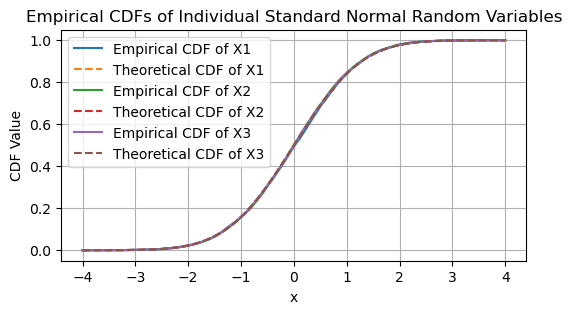

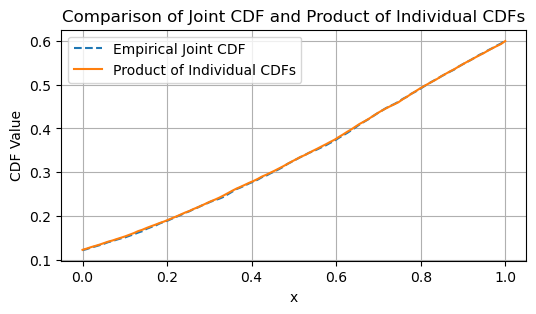

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Define the parameters
n = 3  # Number of random variables
num_samples = 10000  # Number of samples to simulate
x_values = np.linspace(0, 1, 100)  # Values for the CDF

# Generate n independent random variables from a standard normal distribution (mean=0, std=1)
random_vars_standard_normal = [np.random.normal(0, 1, num_samples) for _ in range(n)]

# Define a wider range of x values to cover the tails of the standard normal distribution
x_values_standard_normal = np.linspace(-4, 4, 200)

# Plot the individual CDFs of each standard normal random variable
plt.figure(figsize=(6, 3))

for i, var in enumerate(random_vars_standard_normal):
    empirical_cdf = [np.mean(var <= x) for x in x_values_standard_normal]
    plt.plot(x_values_standard_normal, empirical_cdf, label=f'Empirical CDF of X{i+1}')
    
    theoretical_cdf = norm.cdf(x_values_standard_normal)
    plt.plot(x_values_standard_normal, theoretical_cdf, label=f'Theoretical CDF of X{i+1}', linestyle='--')



plt.xlabel('x')
plt.ylabel('CDF Value')
plt.title('Empirical CDFs of Individual Standard Normal Random Variables')
plt.legend()
plt.grid()
plt.show()


# Calculate the empirical joint CDF
joint_cdf_values = []
for x in x_values:
    joint_cdf_values.append(np.mean(np.all([var <= x for var in random_vars_standard_normal], axis=0)))

# Calculate the product of individual CDFs
individual_cdfs = [np.mean(var <= x_values[:, None], axis=1) for var in random_vars_standard_normal]
product_cdf_values = np.prod(individual_cdfs, axis=0)

# Plot the results
plt.figure(figsize=(6, 3))
plt.plot(x_values, joint_cdf_values, label='Empirical Joint CDF', linestyle='--')
plt.plot(x_values, product_cdf_values, label='Product of Individual CDFs', linestyle='-')
plt.xlabel('x')
plt.ylabel('CDF Value')
plt.title('Comparison of Joint CDF and Product of Individual CDFs')
plt.legend()
plt.grid()
plt.show()


### Limit Theorems for Sums of Random Variables

When dealing with a sequence of **independent and identically distributed (IID)** random variables $ \{X_i, i = 1, 2, 3, \ldots \} $, it is intuitive to expect that the **sample mean**, also known as, **running average**:

$$
Y_n = \frac{1}{n} \sum_{i=1}^n X_i
$$

should converge, in some sense, to the expected value (mean) of the random variables as the number of observations $ n $ becomes large.



#### The Limit Theorems

Two fundamental theorems provide a rigorous framework for understanding how the running average $ Y_n $ behaves as $ n \to \infty $:

1. **Law of Large Numbers (LLN):**
   - The LLN states that, as $ n $ grows, the sample mean $ Y_n $ converges to the true mean $ \mathbb{E}[X] $ of the random variable $ X $.
   - This convergence can be interpreted in different senses (e.g., almost surely or in probability), depending on the version of the LLN being considered (Strong LLN or Weak LLN).

2. **Central Limit Theorem (CLT):**
   - The CLT provides a deeper insight into the distribution of the sample mean $ Y_n $. It states that, for sufficiently large $ n $, the distribution of the scaled deviation:

     $$
     \sqrt{n} \left(Y_n - \mathbb{E}[X]\right)
     $$
     
     approaches a normal distribution with mean 0 and variance equal to the variance of $ X $, $ \sigma^2 = \text{Var}(X) $.
   - This result explains why the normal distribution arises so frequently in statistics and nature.



**Key Intuitions**  
- **LLN:** Guarantees that $ Y_n $ gets closer to the true mean $ \mathbb{E}[X] $ as $ n $ increases.
- **CLT:** Describes the variability of $ Y_n $ around $ \mathbb{E}[X] $ for large $ n $, showing that the fluctuations follow a normal distribution.

**Practical Significance**  

- These limit theorems form the cornerstone of statistical inference, underpinning the validity of approximations, confidence intervals, and hypothesis testing.
- The LLN ensures the reliability of long-term averages, while the CLT provides tools for quantifying uncertainty in estimates.

### The Law of Large Numbers (LLN)

The **law of large numbers (LLN)** is a foundational result in probability theory that formalizes the intuitive idea that the sample mean of a sequence of random variables converges to their expected value as the sample size becomes very large.



#### **Theorem: Strong Law of Large Numbers (S-LLN)**
Let $ \{X_i, i = 1, 2, \ldots\} $ be a sequence of independent and identically distributed (IID) random variables with finite mean $ \mathbb{E}[X_1] < \infty $. 

Then, the S-LLN is stated as [Proakis, Eq. (2.5-2)]:

$$
\frac{1}{n} \sum_{i=1}^n X_i \to \mathbb{E}[X_1]
$$

as $ n \to \infty $.


**Type of Convergence**  
The convergence described by the **strong law of large numbers** is **almost everywhere (a.e.)** or **almost surely (a.s.)**. This means that:
- For almost every outcome in the probability space, the sample mean converges to the expected value.
- The probability of the set of outcomes where convergence does not occur is zero.

In mathematical terms:

$$
\Pr\left(\lim_{n \to \infty} \frac{1}{n} \sum_{i=1}^n X_i = \mathbb{E}[X_1]\right) = 1.
$$

For a sequence of **independent and identically distributed (IID)** random variables $ \{X_1, X_2, \ldots, X_n\} $, the following holds:

**Identical Expected Value**  

$$
\mathbb{E}[X_1] = \mathbb{E}[X_2] = \cdots = \mathbb{E}[X_n] = \mu
$$

where $ \mu $ is the **true mean** of the underlying distribution. Since all the random variables share the same distribution, they also share the same expected value.

The equality $ \mathbb{E}[X_1] = \mathbb{E}[X_2] = \cdots = \mathbb{E}[X_n] $ ensures that the sequence of random variables behaves consistently in expectation, which is a key requirement for applying the SLLN.

**True Mean**  
The term "true mean" refers to this common expected value $ \mu $. It represents the theoretical average value of the random variable if we could sample infinitely many observations.

**Sample Mean Convergence**  
The Strong Law of Large Numbers (SLLN) states that the sample mean:

$$
\bar{X}_n = \frac{1}{n} \sum_{i=1}^n X_i
$$

converges to $ \mu $ (the true mean) as $ n \to \infty $. This means that with a large enough sample size, the sample mean becomes a reliable estimator of the true mean.


The formal way to express the Strong Law of Large Numbers is:

$$
\boxed{
\frac{1}{n} \sum_{i=1}^n X_i \xrightarrow{\text{a.s.}} \mu
}
$$

where:
- $ \xrightarrow{\text{a.s.}} $: This symbol denotes **almost sure convergence**, which means that the sequence of random variables $ \frac{1}{n} \sum_{i=1}^n X_i $ converges to $ \mu $ with probability 1 as $ n \to \infty $.


**Practical Implications**  
- The LLN ensures that repeated sampling or experimentation yields results that approach the true mean of the population.
- It justifies why averages of large samples are reliable estimates of the population mean in fields such as economics, physics, and data science.

#### Example: S-LLN for Standard Normal RV
For a standard normal distribution ($ N(0, 1) $):
- $ \mathbb{E}[X_1] = \mathbb{E}[X_2] = \cdots = \mathbb{E}[X_n] = 0 $, so $ \mu = 0 $, the true mean.

This property guarantees that the sample mean calculated from the sequence will converge to 0 as $ n \to \infty $.

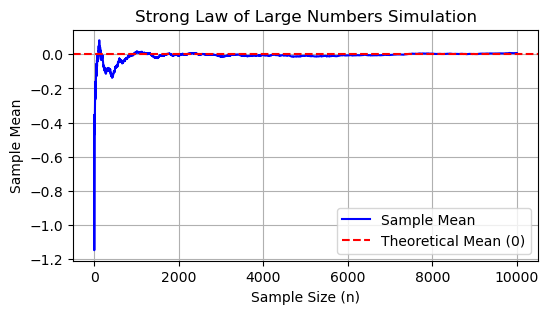

In [18]:
# Parameters
num_iterations = 10000  # Total number of random variables (sequence size)
sample_sizes = range(1, num_iterations + 1)  # Incremental sample sizes

# Define X1 as the first random variable from a standard normal distribution
X1 = np.random.normal(0, 1)

# Generate the rest of the sequence X2, X3, ..., Xn
rest_of_sequence = np.random.normal(0, 1, num_iterations - 1)

# Combine X1 and the rest of the sequence to form the full sequence
full_sequence = np.concatenate(([X1], rest_of_sequence))

# Compute cumulative sample means
sample_means = [np.mean(full_sequence[:n]) for n in sample_sizes]

# Theoretical mean of a standard normal distribution
theoretical_mean = 0

# Plot the convergence of the sample mean
plt.figure(figsize=(6, 3))
plt.plot(sample_sizes, sample_means, label='Sample Mean', linestyle='-', color='blue')
plt.axhline(theoretical_mean, color='red', linestyle='--', label='Theoretical Mean (0)')
plt.xlabel('Sample Size (n)')
plt.ylabel('Sample Mean')
plt.title('Strong Law of Large Numbers Simulation')
plt.legend()
plt.grid()
plt.show()


### The Central Limit Theorem (CLT)

The **central limit theorem (CLT)** is a cornerstone of probability and statistics. It explains how the distribution of the sample mean of a sequence of random variables converges to a normal distribution, regardless of the original distribution of the variables, provided certain conditions are met.



#### Theorem: Central Limit Theorem
Let $ \{X_i, i = 1, 2, \ldots\} $ be a sequence of independent and identically distributed (IID) random variables with:
- True mean: $ \mu = \mathbb{E}[X_1] < \infty $,
- Variance: $ \sigma^2 = \text{Var}[X_1] < \infty $.

Then, the standardized sum of these variables:

$$
Z = \frac{\frac{1}{n} \sum_{i=1}^n X_i - \mu}{\frac{\sigma}{\sqrt{n}}}
$$

converges in distribution to a standard normal random variable:

$$
Z \to \mathcal{N}(0, 1),
$$

as $ n \to \infty $.

**Implications**  
- **Standardization**:
   - The numerator $ \frac{1}{n} \sum_{i=1}^n X_i - \mu $ represents the deviation of the sample mean from the true mean.
   - The denominator $ \frac{\sigma}{\sqrt{n}} $ scales this deviation by the standard error, accounting for variability and sample size.

- **Type of Convergence**:
   - The convergence described in the CLT is **convergence in distribution**, which means that the cumulative distribution function (CDF) of $ Z $ approaches the CDF of a standard normal distribution $ \mathcal{N}(0, 1) $ as $ n $ becomes large.



**Practical Implications**  
1. **Normal Approximation**:
   - For sufficiently large $ n $, the distribution of the sample mean can be approximated by a normal distribution, even if the original $ X_i $ are not normally distributed.

2. **Foundation for Statistical Inference**:
   - The CLT justifies the use of normal distribution-based methods for hypothesis testing, confidence intervals, and other inferential techniques.


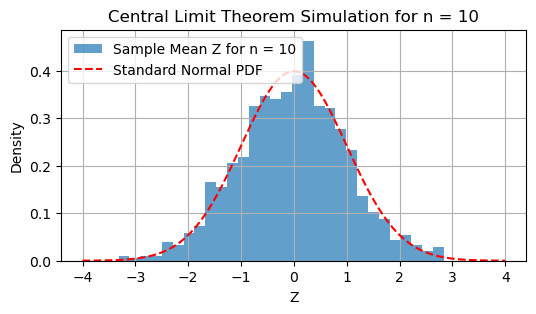

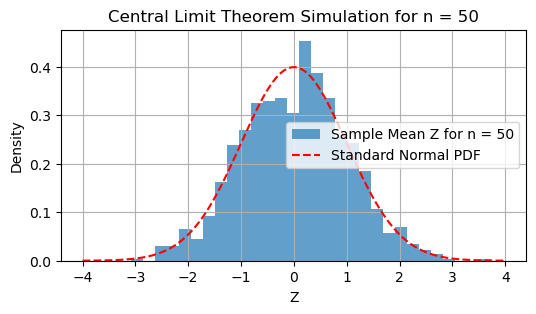

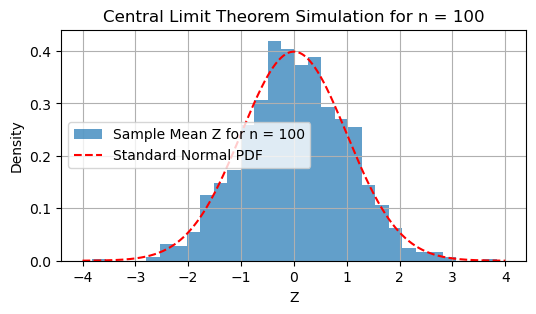

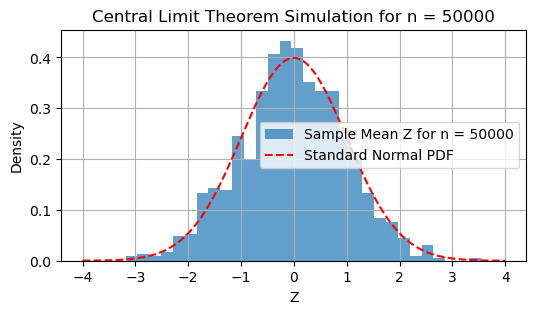

In [19]:
# Parameters for the simulation
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

num_trials = 1000  # Number of trials for approximating the distribution of Z
n_values = [10, 50, 100, 50000]  # Different sample sizes to show convergence

# True mean and variance of the distribution
mu = 13  # Mean of the distribution
sigma = 13  # Standard deviation of the distribution

# Simulation to compute Z for different sample sizes
for n in n_values:

    # Simulate num_trials sets of size n to approximate Z
    trials = np.random.normal(mu, sigma, (num_trials, n))
    trial_means = np.mean(trials, axis=1)

    # Standardize the sample means to compute Z
    Z_values = (trial_means - mu) / (sigma / np.sqrt(n))

    # Plot the histogram of Z values
    plt.figure(figsize=(6, 3))
    plt.hist(Z_values, bins=30, density=True, alpha=0.7, label=f'Sample Mean Z for n = {n}')

    # Overlay the theoretical standard normal distribution
    x = np.linspace(-4, 4, 500)
    plt.plot(x, stats.norm.pdf(x, 0, 1), label='Standard Normal PDF', color='red', linestyle='--')

    plt.title(f'Central Limit Theorem Simulation for n = {n}')
    plt.xlabel('Z')
    plt.ylabel('Density')
    plt.legend()
    plt.grid()
    plt.show()


### Applied to the Gamma Distribution

The probability density function (PDF) of the **Gamma distribution** is given by:

$$
f_X(x; \alpha, \theta) = \frac{1}{\Gamma(\alpha) \theta^\alpha} x^{\alpha - 1} e^{-\frac{x}{\theta}}, \quad x > 0, \, \alpha > 0, \, \theta > 0,
$$

where:

- $ \alpha $ (shape parameter) determines the shape of the distribution.
- $ \theta $ (scale parameter) stretches or compresses the distribution horizontally.
- $ \Gamma(\alpha) $ is the Gamma function, defined as:

  $$
  \Gamma(\alpha) = \int_0^\infty t^{\alpha - 1} e^{-t} \, dt.
  $$

The Gamma distribution, parameterized by the shape parameter $ k $ (or $ \alpha $) and scale parameter $ \theta $, has the following properties:

1. **Mean**: 

   $$
   \mu = k \cdot \theta
   $$

2. **Variance**: 

   $$
   \sigma^2 = k \cdot \theta^2
   $$

Let $ X_1, X_2, \ldots, X_n $ be independent and identically distributed (IID) random variables from a Gamma distribution, such that $ X_i \sim \text{Gamma}(k, \theta) $. The sample mean is defined as:

$$
\bar{X}_n = \frac{1}{n} \sum_{i=1}^n X_i.
$$

To standardize this sample mean, we use:

$$
Z_n = \frac{\bar{X}_n - \mu}{\frac{\sigma}{\sqrt{n}}},
$$

where $ \mu = k \cdot \theta $ is the true mean, and $ \sigma = \sqrt{k \cdot \theta^2} $ is the standard deviation. Substituting these values, $ Z_n $ becomes:

$$
Z_n = \frac{\bar{X}_n - k \cdot \theta}{\sqrt{\frac{k \cdot \theta^2}{n}}}.
$$

Convergence to the Standard Normal Distribution

As $ n \to \infty $, the distribution of $ Z_n $ converges in distribution to the standard normal distribution:

$$
Z_n \overset{d}{\to} \mathcal{N}(0, 1).
$$

This implies:

1. The sample mean $ \bar{X}_n $ remains centered around the true mean $ \mu = k \cdot \theta $.
2. The variability of $ \bar{X}_n $, scaled by $ \sqrt{n} $, decreases, leading to a closer approximation of the standard normal distribution.


##### Verification via Simulation

The histogram simulation verifies the Central Limit Theorem (CLT). As $ n $ increases, the distribution of the standardized sample means ($ Z_n $) increasingly resembles the standard normal distribution. This is a direct consequence of the CLT, as the effects of the Gamma distribution's shape diminish with larger sample sizes.

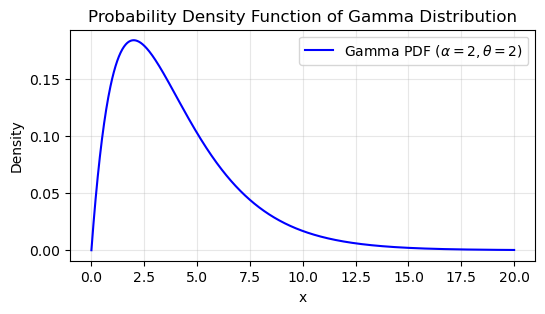

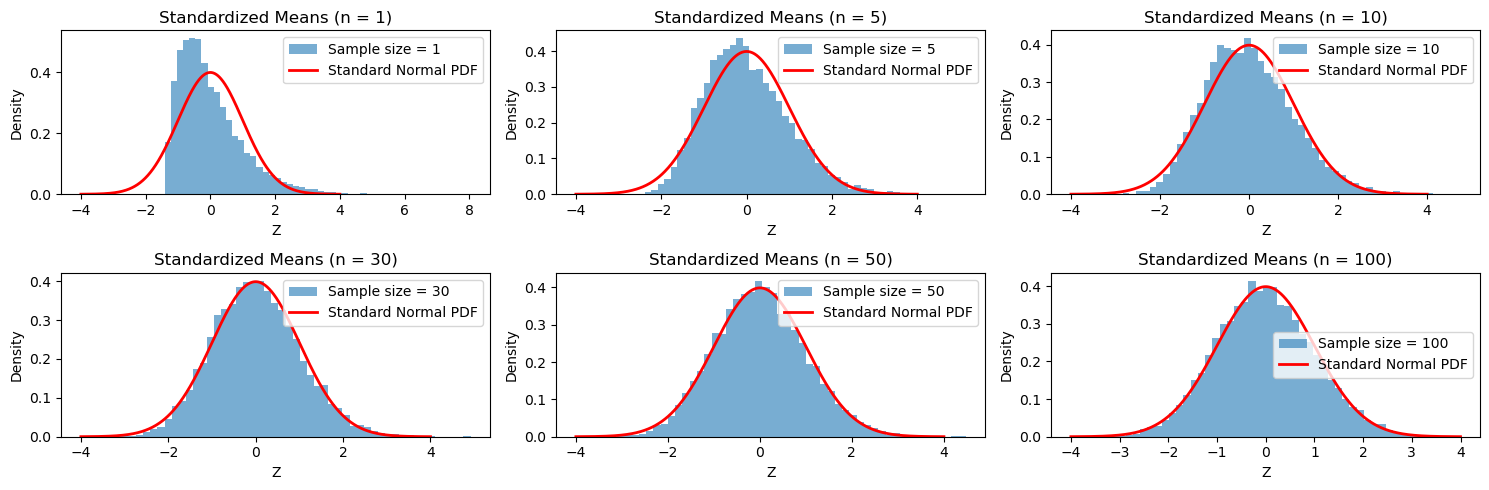

In [20]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters for the Gamma distribution
shape_param = 2  # Shape parameter (alpha)
scale_param = 2  # Scale parameter (theta)

# Generate x values for plotting
x = np.linspace(0, 20, 1000)  # Range of x values

# Compute the PDF of the Gamma distribution
pdf = stats.gamma.pdf(x, a=shape_param, scale=scale_param)

# Plot the PDF
plt.figure(figsize=(6, 3))
plt.plot(x, pdf, label=f"Gamma PDF ($\\alpha={shape_param}, \\theta={scale_param}$)", color='blue')
plt.title("Probability Density Function of Gamma Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


# Simulation parameters
n_samples = 1000  # Number of samples per simulation
sample_sizes = [1, 5, 10, 30, 50, 100]  # Varying sample sizes for the CLT demonstration
n_simulations = 10000  # Number of simulations

# True mean and variance of the Gamma distribution
true_mean = shape_param * scale_param
true_variance = shape_param * scale_param**2
true_std = np.sqrt(true_variance)

# Collecting standardized means for each sample size
standardized_means = {}

for n in sample_sizes:
    sample_means = []
    for _ in range(n_simulations):
        sample = np.random.gamma(shape_param, scale_param, n)
        sample_mean = np.mean(sample)
        standardized_mean = (sample_mean - true_mean) / (true_std / np.sqrt(n))
        sample_means.append(standardized_mean)
    standardized_means[n] = sample_means

# Plotting the results
plt.figure(figsize=(15, 5))
for i, n in enumerate(sample_sizes, 1):
    plt.subplot(2, 3, i)
    plt.hist(standardized_means[n], bins=50, density=True, alpha=0.6, label=f'Sample size = {n}')
    
    # Plot standard normal PDF for reference
    x = np.linspace(-4, 4, 500)
    plt.plot(x, stats.norm.pdf(x), 'r-', lw=2, label='Standard Normal PDF')
    
    plt.title(f'Standardized Means (n = {n})')
    plt.xlabel('Z')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


### Applied to the Poisson Distribution

#### Definition of the Poisson Random Variable (RV)
A Poisson random variable $ X $ represents the number of events occurring in a fixed interval of time or space, assuming:
1. Events occur independently.
2. The average rate ($ \lambda $) of events is constant.
3. The probability of more than one event occurring in an infinitesimally small interval is negligible.

The Poisson random variable is parameterized by:
- $ \lambda > 0 $: the rate (or mean) of occurrences in the interval.

#### Probability Mass Function (PMF)
The PMF of a Poisson RV is defined as:

$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}, \quad k = 0, 1, 2, \dots
$$

where:
- $ k $: the number of events (a non-negative integer).
- $ \lambda $: the mean and variance of the Poisson distribution.

#### True Mean
For a Poisson random variable $ X \sim \text{Poisson}(\lambda) $, the mean is:

$$
\mu = \mathbb{E}[X] = \lambda
$$

#### True Variance
The variance of a Poisson RV is equal to its mean:

$$
\sigma^2 = \text{Var}(X) = \lambda
$$

#### Standardized Sample Mean (Z)
Given $ n $ independent and identically distributed (IID) Poisson random variables $ X_1, X_2, \ldots, X_n $, the sample mean is:

$$
\bar{X}_n = \frac{1}{n} \sum_{i=1}^n X_i
$$

To standardize $ \bar{X}_n $, we use the formula:

$$
Z_n = \frac{\bar{X}_n - \mu}{\sigma / \sqrt{n}}
$$

Substituting $ \mu = \lambda $ and $ \sigma = \sqrt{\lambda} $:

$$
Z_n = \frac{\bar{X}_n - \lambda}{\sqrt{\lambda / n}}
$$

#### Central Limit Theorem (CLT)
As the sample size $ n \to \infty $, the distribution of the standardized sample mean $ Z_n $ converges to the standard normal distribution:

$$
Z_n \overset{d}{\to} \mathcal{N}(0, 1)
$$

This means:
- The mean of $ Z_n $ approaches 0.
- The variance of $ Z_n $ approaches 1.

#### Visualization in the Code
1. **CLT Demonstration**:
   - The simulation generates multiple samples from a Poisson distribution with $ \lambda = 5 $ for varying sample sizes ($ n $).
   - It calculates the standardized sample mean ($ Z_n $) and plots histograms to show the convergence to the standard normal distribution as $ n $ increases.

2. **PMF of a Single Poisson RV**:
   - The code calculates the PMF values for $ k = 0, 1, 2, \ldots, 19 $ using the formula above and plots it to visualize the probability distribution of a Poisson RV with $ \lambda = 5 $. 

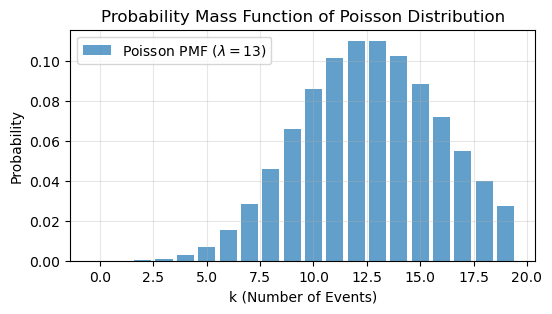

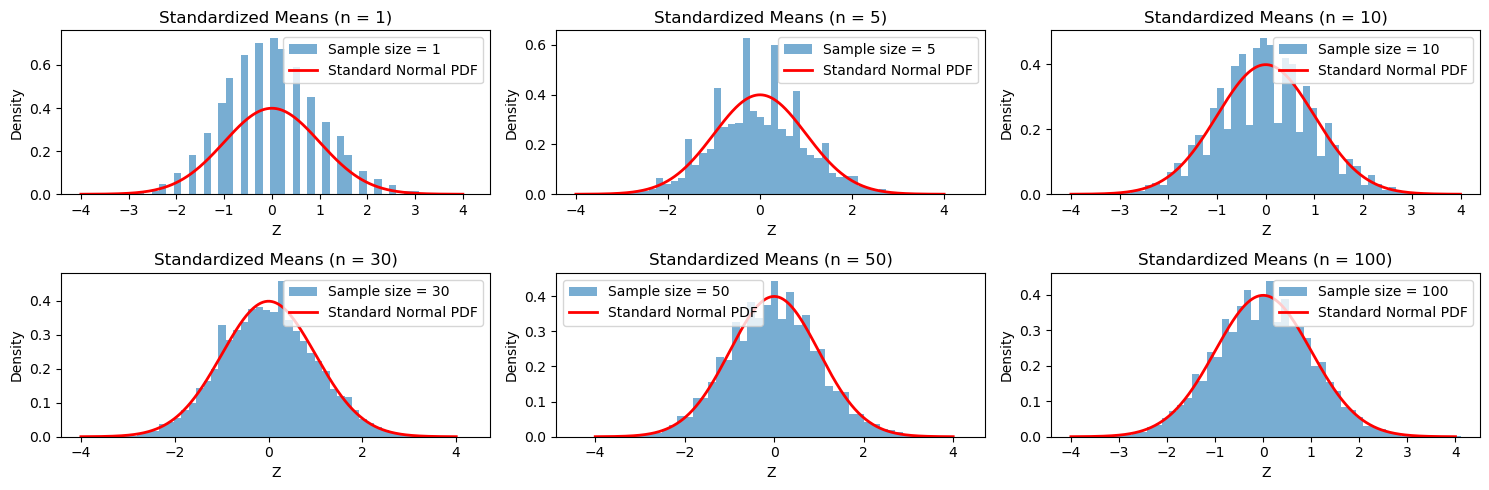

In [21]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
import scipy.stats as stats

warnings.filterwarnings('ignore')

# Parameters for the Poisson distribution
lambda_param = 13  # Rate parameter (mean of the Poisson distribution)

# Simulation parameters
sample_sizes = [1, 5, 10, 30, 50, 100]  # Varying sample sizes for the CLT demonstration
n_simulations = 10000  # Number of simulations

# True mean and variance of the Poisson distribution
true_mean = lambda_param
true_variance = lambda_param
true_std = np.sqrt(true_variance)

# Collecting standardized means for each sample size
standardized_means_poisson = {}

for n in sample_sizes:
    sample_means = []
    for _ in range(n_simulations):
        sample = np.random.poisson(lambda_param, n)
        sample_mean = np.mean(sample)
        standardized_mean = (sample_mean - true_mean) / (true_std / np.sqrt(n))
        sample_means.append(standardized_mean)
    standardized_means_poisson[n] = sample_means

# Plotting the PDF of a single Poisson RV
k = np.arange(0, 20, 1)  # Values for which the PMF will be calculated
poisson_pmf = stats.poisson.pmf(k, mu=lambda_param)

plt.figure(figsize=(6, 3))
plt.bar(k, poisson_pmf, alpha=0.7, label=f'Poisson PMF ($\lambda={lambda_param}$)')
plt.title("Probability Mass Function of Poisson Distribution")
plt.xlabel("k (Number of Events)")
plt.ylabel("Probability")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# Plotting the results
plt.figure(figsize=(15, 5))
for i, n in enumerate(sample_sizes, 1):
    plt.subplot(2, 3, i)
    plt.hist(standardized_means_poisson[n], bins=50, density=True, alpha=0.6, label=f'Sample size = {n}')
    
    # Plot standard normal PDF for reference
    x = np.linspace(-4, 4, 500)
    plt.plot(x, stats.norm.pdf(x), 'r-', lw=2, label='Standard Normal PDF')
    
    plt.title(f'Standardized Means (n = {n})')
    plt.xlabel('Z')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


